# W207 Final Project Baseline
Authors: John Lee, Nathan Nusaputra, Ryan Sawasaki

## Abstract

For our baseline model, we decided to use three features detailing the square footage of a home due to domain knowledge. These features are: 'GrLivArea', 'TotalBsmtSF','GarageArea'.  We determined that the linear regression model would be our baseline model since it had the highest accuracy out of the three models we tried using. We will evaluate our future performances on this baseline model.  

Key items that will continue to be discussed:  
A) What will be our evaluation function?  Accuracy with ".score" or Root-Mean-Squared-Error?
B) How are we going to standardize the model (if needed)?  StandardScaler? or another package?
C) Which machine learning model to use? Which hyperparameters to tune? Which features to use?

Steps:  
1) Importing Packages  
We imported a bunch of standard libraries (numpy, pandas, seaborn, etc..) as well as a bunch of sci-kit learn libraries for preprocessing, metrics, and models.  

2) Load and Inspect Data  
We loaded our raw data and inspected the data type and a few samples.  


3) Exploratory Data Analysis  
While exploring the data, we found that there are a lot of missing data. 33 features of the actual test data (data without class labels/sales price) had NaN data while only 19 features of the training data had NaN data. After the baseline, we intend to fill these NaN with zeros when appropriate or just drop the features.  


4) Correlations between Sales Price and Different Features  
We graphed the correlation between Sales Price with float/int type data.  We graphed a few features of object type data with Sales Price to show how we anaylzed the data. Those we find most relative to sales price will be used for our final models (not in this baseline). 


5) Baseline Models  
We determined the features that we will use for our baseline model. Did a scatter plot matrix to further dive into the data. We also did a linear model, kneighbors model, and gradient boosting model (all regressions) on these features to general a baseline model for our project.


## Importing Packages

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import time
import numpy as np
import pandas as pd # to read in csv
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble


# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# SK-learn libraries for feature extraction from text.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

## Load and Inspect Data

In [2]:
#Read in data

# house price data
train_df_raw = pd.read_csv("data_raw\\train.csv") 
test_df_raw = pd.read_csv("data_raw\\test.csv")

print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)
print(train_df_raw.dtypes.value_counts())
train_df_raw.head(2)

Train Shape: (1460, 81)
Test Shape: (1459, 80)
object     43
int64      35
float64     3
dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


## Exploratory Data Analysis

In [3]:
train_df_raw.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
test_df_raw.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


**Comment**:
The describe function showed us that we should consider NaN data on many features (see below). Also, it was interesting to see the range of sales price (from 34,900 to 755,000USD) and other feature characteristics.

In [5]:
# Checking Missingness

# TRAINING DATA MISSINGNESS 
df_missing_data = train_df_raw.isnull().sum(axis=0)[train_df_raw.isnull().sum(axis=0) != 0]
# TEST DATA MISSINGNESS
df_missing_data2 = test_df_raw.isnull().sum(axis=0)[test_df_raw.isnull().sum(axis=0) != 0]

# Code to see which sample Id has missing data per feature
feature_train='MasVnrType'
print("Train Feature %s has NaN at following indices:" %feature_train, train_df_raw["Id"][train_df_raw[feature_train].isnull()].unique())
print("")
feature_test='MasVnrType'
print("Test Feature %s has NaN at following indices:" %feature_test, test_df_raw["Id"][test_df_raw[feature_test].isnull()].unique())
print("")

print("Number of train features with missing data:", len(df_missing_data))
#histograms of features with missing data
print("Number of test features with missing data:", len(df_missing_data2))


df_missing1 = pd.DataFrame(df_missing_data, columns=['train_missing_count'])
df_missing2 = pd.DataFrame(df_missing_data2,columns=['test_missing_count'])
df_missing = pd.merge(df_missing1,df_missing2, left_on=df_missing1.index, right_on=df_missing2.index, how='outer')
df_missing.columns=['feature','train_missing_count','test_missing_count']
df_missing=df_missing.sort_values(by=['test_missing_count'], ascending=False)
df_missing

Train Feature MasVnrType has NaN at following indices: [ 235  530  651  937  974  978 1244 1279]

Test Feature MasVnrType has NaN at following indices: [1692 1707 1883 1993 2005 2042 2312 2326 2341 2350 2369 2593 2611 2658
 2687 2863]

Number of train features with missing data: 19
Number of test features with missing data: 33


,feature,train_missing_count,test_missing_count
16,PoolQC,1453.0,1456.0
18,MiscFeature,1406.0,1408.0
1,Alley,1369.0,1352.0
17,Fence,1179.0,1169.0
10,FireplaceQu,690.0,730.0
0,LotFrontage,259.0,227.0
12,GarageYrBlt,81.0,78.0
13,GarageFinish,81.0,78.0
14,GarageQual,81.0,78.0
15,GarageCond,81.0,78.0


**Comment**:  
We found many features with NaN data. We intend to fill these NaN data with our domain knowledge (i.e. for those missing "LotFrontage" for size of front lot data, we would just show 0's instead of NaN).  Otherwise, we will drop the feature themselves (i.e. "PoolQC" for Pool Quality).

In [6]:
# Check for Duplicates?
print("Duplicates in Train Data:",sum(train_df_raw.duplicated()))
print("Duplicates in Test Data:",sum(test_df_raw.duplicated()))

Duplicates in Train Data: 0
Duplicates in Test Data: 0


**Comment**:  
There are no duplicated data.

## Checking Correlations between Sales Price and Other Features

In [7]:
##Number of each Type of data:
# print(train_df_raw.dtypes[(train_df_raw.dtypes != 'float') & (train_df_raw.dtypes !='int64')])
print("Float: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'float')]))
print("Int: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'int64')]))
print("Object: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'object')]))

Float: 3
Int: 35
Object: 43


**Comment**:  
Since the data type range from Float, Int, to Object, we must show correlation differently.  Float and Int type data can be shown with a correlation graph.  Object type data can be shown with boxplot or lmplot.
    

Float & Int Features: 37


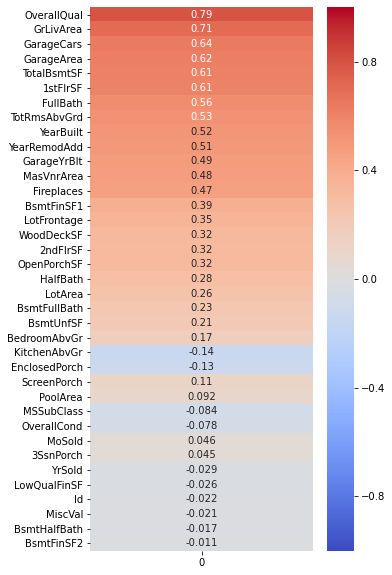

In [8]:
#Correlations between Sales Price & Int/Float Features
correlations = train_df_raw.corrwith(train_df_raw['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

**Comment**:  
We can see that OverallQual, GrLivArea, GarageCars are the top 3 most correlated features to Sales Price.  

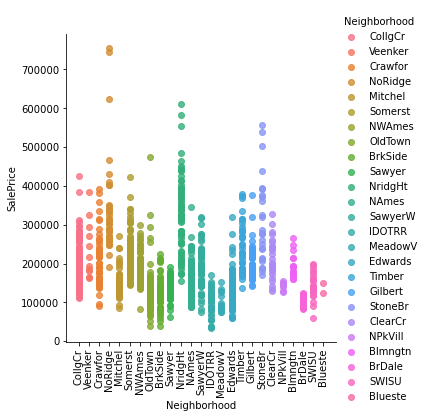

In [9]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: Neighborhood

neighborhood_df = train_df_raw[['Neighborhood','SalePrice']]
neigh_plot = sns.lmplot('Neighborhood', 'SalePrice', data=neighborhood_df, hue='Neighborhood', fit_reg=False)
neigh_plot.set_xticklabels(rotation=90)

**Comment**:  
We see that for certain neighborhoods, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

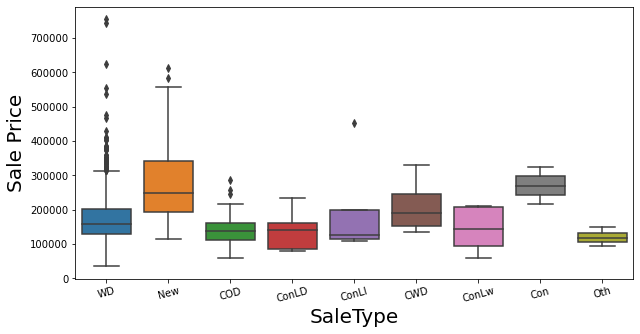

In [10]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: SaleType

feature_object = 'SaleType'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.SaleType     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(10,5))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for New (just constructed and sold) and Con (15% down payment) Type, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

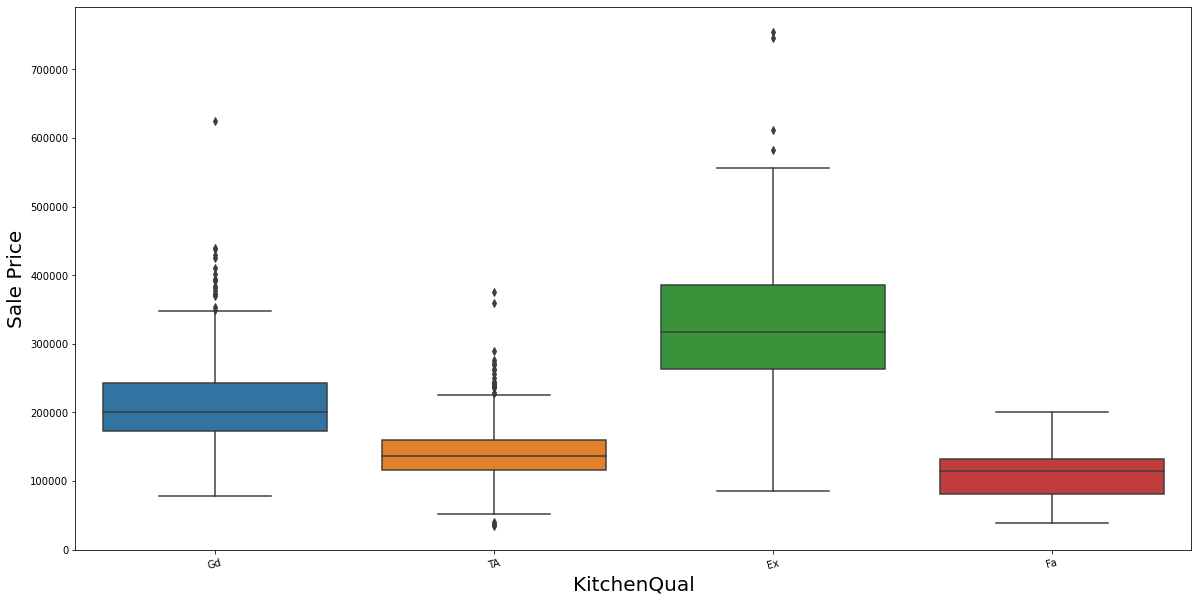

In [11]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: KitchenQual

feature_object = 'KitchenQual'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.KitchenQual     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for Ex (excellent) kitchen quality, the Sales Price is generally higher.

## Baseline Model(s)

**Comment**:
Using our domain knowledge, we believe the square footage of a house is most indicative of a house's sales price. We can see that the Ground Living Area (GrLivArea), Total Basement Area (TotalBsmtSF), and Garage Area (GarageArea) are 3 of the top 5 most correlated to the Sales Price in the plot above. Therefore, our baseline model will include these three features.

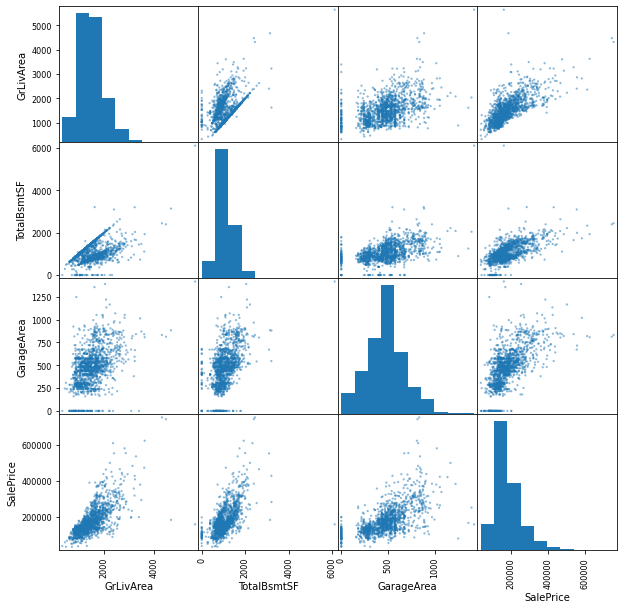

In [12]:
# Scatterplot matrix of baseline model features

baseline_features=['GrLivArea', 'TotalBsmtSF','GarageArea','SalePrice']
train_df_baseline=train_df_raw[baseline_features]
train_df_baseline.head()
ax = pd.plotting.scatter_matrix(train_df_baseline,
                                figsize=(10,10),
                                marker='o', s=5)
for ax in ax.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)

**Comment**:  
Scatterplot matrix shows trends indicating that sales price goes up when ground living area, basement area, and garage area goes up.

In [13]:
# Format Data for Modeling

#Standardize Data
scaler=StandardScaler()
train_df_std=pd.DataFrame(scaler.fit_transform(train_df_baseline))
X = train_df_std.iloc[:,:-1]
y = train_df_std.iloc[:,-1]
train_data_bl_std, dev_data_bl_std, train_labels_bl_std, dev_labels_bl_std = train_test_split(X,y, test_size=0.2) 
print("Standardized Train Data Shape:", train_data_bl_std.shape)
print("Standardized Dev Data Shape:", dev_data_bl_std.shape)

#Did not Standardize Data
X = train_df_baseline.iloc[:,:-1]
y = train_df_baseline.iloc[:,-1]
train_data_bl, dev_data_bl, train_labels_bl, dev_labels_bl = train_test_split(X,y, test_size=0.2)  
print("UnStandardized Train Data Shape:", train_data_bl.shape)
print("UnStandardized Dev Data Shape:", dev_data_bl.shape)

Standardized Train Data Shape: (1168, 3)
Standardized Dev Data Shape: (292, 3)
UnStandardized Train Data Shape: (1168, 3)
UnStandardized Dev Data Shape: (292, 3)


**Comment**:
We started work with non-standardized data because we were only comparing square footage features in our baseline. However, we will investigate standardized data further after this baseline model

Estimated function: y = -20418.29 + 67.47*x_1 + 46.55*x_2 + 104.50*x_3
R^2: 0.6439784556177048
Accuracy: 0.7251224998312179
Root Mean Squared Error: 43316.40702357577


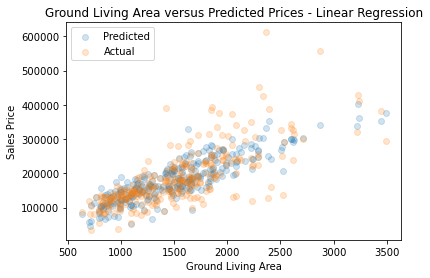

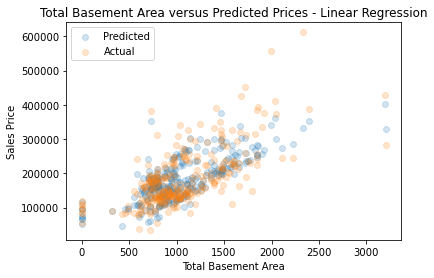

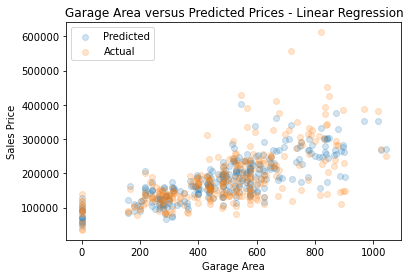

In [14]:
#Linear regression model without Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl, train_labels_bl)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl)    #predict
print("R^2:",lr.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))

fig2=plt.figure()
fig2=plt.title('Ground Living Area versus Predicted Prices - Linear Regression')
fig2=plt.xlabel('Ground Living Area')
fig2=plt.ylabel('Sales Price')
fig2=plt.scatter(dev_data_bl['GrLivArea'],prediction, alpha=0.2)
fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_labels_bl, alpha=0.2)
fig2=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig3=plt.figure()
fig3=plt.title('Total Basement Area versus Predicted Prices - Linear Regression')
fig3=plt.xlabel('Total Basement Area')
fig3=plt.ylabel('Sales Price')
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],prediction, alpha=0.2)
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],dev_labels_bl, alpha=0.2)
fig3=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig4=plt.figure()
fig4=plt.title('Garage Area versus Predicted Prices - Linear Regression')
fig4=plt.xlabel('Garage Area')
fig4=plt.ylabel('Sales Price')
fig4=plt.scatter(dev_data_bl['GarageArea'],prediction, alpha=0.2)
fig4=plt.scatter(dev_data_bl['GarageArea'],dev_labels_bl, alpha=0.2)
fig4=plt.legend(['Predicted', 'Actual'],loc='upper left')

**Comment**:  
It appears that the linear regression model without standardized data performed the best in terms of accuracy.

In [15]:
#Linear regression model with Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl_std, train_labels_bl_std)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl_std)    #predict
print("R^2:",lr.score(train_data_bl_std,train_labels_bl_std))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl_std,dev_labels_bl_std))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl_std, prediction, squared=False))

Estimated function: y = -0.00 + 0.47*x_1 + 0.33*x_2 + 0.27*x_3
R^2: 0.7114761818985047
Accuracy: 0.4654483981670771
Root Mean Squared Error: 0.7650666138128865


**Comment**:  
It appears that the linear regression model with standardized data performed worse but the RMSE is much lower.

In [16]:
#K-Nearest Neighbors Regressor Model

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(train_data_bl, train_labels_bl)  
prediction = knn.predict(dev_data_bl)
print("R^2:",knn.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",knn.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))


R^2: 0.9983157512681696
Accuracy: 0.46937591961714936
Root Mean Squared Error: 60183.34290381989


**Comment**:  
We wanted to try out k Neighbors to see its performance. It appears that the k neighbors regression model with non-standardized data had lower accuracy than linear regression.

In [17]:
#Gradient Boosting Regressor Model

train_data_bl = train_data_bl[['GrLivArea', 'TotalBsmtSF','GarageArea']]
dev_data_bl = dev_data_bl[['GrLivArea','TotalBsmtSF', 'GarageArea']]
gradbst = ensemble.GradientBoostingRegressor(n_estimators = 10, max_depth=5, min_samples_split=2, learning_rate=0.1,
                                            loss='ls')
gradbst.fit(train_data_bl, train_labels_bl)
prediction = gradbst.predict(dev_data_bl)
gradbst.score(dev_data_bl,dev_labels_bl)

print("R^2:",gradbst.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",gradbst.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))


R^2: 0.7330373829107583
Accuracy: 0.6643609973207428
Root Mean Squared Error: 47865.107719696854


**Comment**:  
We wanted to try out gradient boosting regressor with nonstandardized data to also see its performance. It appears to have relatively high accuracy compared with linear regression and k-nearest neighbors regression.   


## Data Formatting

After EDA, we have determined several features that may be dropped due to large amounts of missing/NaN data. Other features with missing/NaN data will be converted to None or 0 value so that the feature may still be used in our model.  

Categorical data will be separated to ordinal and nominal. Ordinal data will be converted to integers that include the ordering of the data. Nominal data will be converted to dummy variables.  

Finally, we will standard scale all of the independent features while leaving the dependent feature (saleprice) alone.

In [18]:
# ORIGINAL DATA SIZE FOR REFERENCE
print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)

Train Shape: (1460, 81)
Test Shape: (1459, 80)


In [19]:
# DROPPING TOP 5 MOST MISSING/NAN FEATURES:
top_5_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train_df_raw2 = train_df_raw.drop(top_5_missing,axis=1)
test_df_raw2 = test_df_raw.drop(top_5_missing,axis=1)
print("Train Data Dropped Top 5 Missing/NaN Columns Shape:", train_df_raw2.shape)
print("Test Data Dropped Top 5 Missing/NaN Columns Shape:", test_df_raw2.shape)

Train Data Dropped Top 5 Missing/NaN Columns Shape: (1460, 76)
Test Data Dropped Top 5 Missing/NaN Columns Shape: (1459, 75)


In [20]:
# CONVERTING NAN DATA TO 0 OR NONE

#Numerical Data to 0
numerical_NaN = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars',
                 'GarageArea']
train_df_raw2[numerical_NaN]=train_df_raw2[numerical_NaN].fillna(0)
test_df_raw2[numerical_NaN]=test_df_raw2[numerical_NaN].fillna(0)

#Categorical Data to None
categorical_NaN = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType',
                   'SaleType','Electrical','GarageType','Functional','BsmtQual',
                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'KitchenQual','GarageFinish','GarageQual','GarageCond']
train_df_raw2[categorical_NaN]=train_df_raw2[categorical_NaN].fillna('None')
test_df_raw2[categorical_NaN]=test_df_raw2[categorical_NaN].fillna('None')

# Check if it worked by checking Missingness
dftrain_missing = train_df_raw2.isnull().sum(axis=0)[train_df_raw2.isnull().sum(axis=0) != 0] # TRAINING DATA MISSINGNESS 
dftest_missing = test_df_raw2.isnull().sum(axis=0)[test_df_raw2.isnull().sum(axis=0) != 0] # TEST DATA MISSINGNESS
print("Number of train features (after replacing NaN data) with missing data:", len(dftrain_missing))
print("Number of test features (after replacing NaN data) with missing data:", len(dftest_missing))

Number of train features (after replacing NaN data) with missing data: 0
Number of test features (after replacing NaN data) with missing data: 0


In [21]:
# CONVERT ORDINAL DATA TO INTEGERS TO INCLUDE ORDERING OF DATA

# 1 is worst, largest number is best, use mapping
train_df_raw2['Functional']=train_df_raw2['Functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'None':0})
train_df_raw2['BsmtQual']=train_df_raw2['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['BsmtCond']=train_df_raw2['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['BsmtExposure']=train_df_raw2['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'None':0})
train_df_raw2['BsmtFinType1']=train_df_raw2['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['BsmtFinType2']=train_df_raw2['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['KitchenQual']=train_df_raw2['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train_df_raw2['GarageFinish']=train_df_raw2['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['GarageQual']=train_df_raw2['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['GarageCond']=train_df_raw2['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['ExterQual']=train_df_raw2['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['ExterCond']=train_df_raw2['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['LotShape']=train_df_raw2['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'None':0})
train_df_raw2['LandSlope']=train_df_raw2['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1,'NA':0,'None':0})
train_df_raw2['HeatingQC']=train_df_raw2['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['PavedDrive']=train_df_raw2['PavedDrive'].map({'Y':3,'P':2,'N':1,'NA':0,'None':0})

test_df_raw2['Functional']=test_df_raw2['Functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'None':0})
test_df_raw2['BsmtQual']=test_df_raw2['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['BsmtCond']=test_df_raw2['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['BsmtExposure']=test_df_raw2['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'None':0})
test_df_raw2['BsmtFinType1']=test_df_raw2['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['BsmtFinType2']=test_df_raw2['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['KitchenQual']=test_df_raw2['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test_df_raw2['GarageFinish']=test_df_raw2['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['GarageQual']=test_df_raw2['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['GarageCond']=test_df_raw2['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['ExterQual']=test_df_raw2['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['ExterCond']=test_df_raw2['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['LotShape']=test_df_raw2['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'None':0})
test_df_raw2['LandSlope']=test_df_raw2['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1,'NA':0,'None':0})
test_df_raw2['HeatingQC']=test_df_raw2['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['PavedDrive']=test_df_raw2['PavedDrive'].map({'Y':3,'P':2,'N':1,'NA':0,'None':0})


In [22]:
# CONVERT NOMINAL DATA TO DUMMIES

""" Running get_dummies on train and test data separately would not work because some training data could be
missing in test data and vice versa.  Therefore, we will combine all data and get_dummies. 
Reference: https://stackoverflow.com/questions/56738267/how-can-i-align-pandas-get-dummies-across-training-validation-testing 
"""
all_data = pd.concat([train_df_raw2, test_df_raw2]) 
all_data_dummy = pd.get_dummies(all_data)
print("all_data shape:", all_data_dummy.shape)

#We cannot split the data back to train, dev, and test yet, because standardizing features has the same issue

all_data shape: (2919, 241)


In [23]:
# MIN MAX SCALER THE DATA
from sklearn.preprocessing import MinMaxScaler

#First pull out SalePrice column since we won't be standard scaling the dependent feature
X=all_data_dummy.drop(['SalePrice'],axis=1)
Y=all_data_dummy['SalePrice']
print("Shape of all_data (dummies) X:", X.shape)
print("Shape of all_data (dummies) Y:", Y.shape)
#X.head(1)

#Standard Scale!
scaler=MinMaxScaler()
X_std=pd.DataFrame(scaler.fit_transform(X))      #only standard scaled independent features
print("Shape of standardized X:", X_std.shape)
#X_std.head(1)

#Add the Sale Price feature column back into all_data
all_data_std = X_std
all_data_std = all_data_std.assign(SalePrice = list(Y))  #adds SalePrice data back in
print("Shape of standardized X plus SalePrice column:", all_data_std.shape)

Shape of all_data (dummies) X: (2919, 240)
Shape of all_data (dummies) Y: (2919,)
Shape of standardized X: (2919, 240)
Shape of standardized X plus SalePrice column: (2919, 241)


In [24]:
X.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,2,...,0,0,0,1,0,0,0,0,1,0


In [25]:
X_std.head(1)

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.0,0.235294,0.207668,0.03342,0.666667,0.5,0.949275,0.883333,0.1225,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
all_data_std.head(1)

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,SalePrice
0,0.0,0.235294,0.207668,0.03342,0.666667,0.5,0.949275,0.883333,0.1225,0.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500.0


In [27]:
# SPLIT ALL_DATA TO TRAIN/TEST. THEN SPLIT TRAIN TO TEST/DEV.

# Split all_data to Train/Test
train_raw2, test_raw2 = train_test_split(all_data_std, test_size=1459/2919, shuffle=False)
test_raw2 = test_raw2.drop(['SalePrice'],axis=1)  #original test_data did not have SalePrice feature
print(train_raw2.shape)
print(test_raw2.shape)
test_data = test_raw2  #renaming test data

# Split Train data to Test/Dev
x = train_raw2.iloc[:,:-1]
y = train_raw2.iloc[:,-1]
train_data, dev_data, train_labels, dev_labels = train_test_split(x,y, test_size=0.2)  #20% dev, 80% test
print("Standardized Train Data Shape:", train_data.shape)
print("Standardized Dev Data Shape:", dev_data.shape)
print("Train Label Shape:", train_labels.shape)
print("Dev Label Shape:", dev_labels.shape)

(1460, 241)
(1459, 240)
Standardized Train Data Shape: (1168, 240)
Standardized Dev Data Shape: (292, 240)
Train Label Shape: (1168,)
Dev Label Shape: (292,)


In [28]:
# Replace the column names with original feature names from train data
for i in range(len(train_data.columns)):
    train_data = train_data.rename(columns={i: X.columns[i]})

for i in range(len(dev_data.columns)):
    dev_data = dev_data.rename(columns={i: X.columns[i]})

for i in range(len(test_data.columns)):
    test_data = test_data.rename(columns={i: X.columns[i]})

In [29]:
# SUMMARY OF DATA

# "train_data"    = Training Data
# "train_labels"  = Training Labels
# "dev_data"      = Development Data (to check accuracy of Machine Learning models)
# "dev_labels"    = Development Labels (to check accuracy of Machine Learning models)
# "test_data"     = Test Data (to predict housing price for submitting to Kaggle)


print("train_data:", train_data.shape)
print("train_labels:", train_labels.shape)
print("dev_data:", dev_data.shape)
print("dev_labels:", dev_labels.shape)
print("test_data",test_data.shape)

train_data: (1168, 240)
train_labels: (1168,)
dev_data: (292, 240)
dev_labels: (292,)
test_data (1459, 240)


In [118]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
57,0.019534,0.235294,0.284345,0.048354,0.666667,0.500,0.956522,0.900000,0.000000,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
942,0.322824,0.411765,0.134185,0.029966,0.333333,0.250,0.760870,0.450000,0.000000,0.2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
236,0.080877,0.000000,0.207668,0.034930,0.666667,0.500,0.956522,0.900000,0.061250,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1212,0.415353,0.058824,0.159744,0.037580,0.333333,0.625,0.500000,0.000000,0.000000,0.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
89,0.030500,0.000000,0.191693,0.031644,0.333333,0.500,0.884058,0.750000,0.000000,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.426662,0.352941,0.249201,0.050434,0.555556,0.750,0.811594,0.883333,0.046250,0.2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
69,0.023646,0.176471,0.258786,0.066807,0.666667,0.375,0.586957,0.050000,0.000000,0.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1313,0.449966,0.235294,0.345048,0.062979,0.888889,0.500,0.920290,0.816667,0.103125,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
313,0.107265,0.000000,0.479233,1.000000,0.666667,0.500,0.673913,0.250000,0.000000,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.249488,0.214444,0.184379,0.043746,0.566305,0.569456,0.721883,0.583975,0.064720,0.300000,...,0.076199,0.0,0.001712,0.877568,0.071918,0.003425,0.007705,0.011986,0.827055,0.077911
std,0.144408,0.242864,0.110127,0.050649,0.154763,0.138968,0.215506,0.340771,0.115396,0.176416,...,0.265429,0.0,0.041363,0.327924,0.258462,0.058445,0.087479,0.108870,0.378362,0.268146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125685,0.000000,0.130990,0.028979,0.444444,0.500000,0.594203,0.300000,0.000000,0.200000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.246744,0.176471,0.204473,0.037989,0.555556,0.500000,0.731884,0.716667,0.000000,0.200000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.373286,0.294118,0.255591,0.048376,0.666667,0.625000,0.927536,0.900000,0.100000,0.400000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.499657,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Float & Int Features: 239


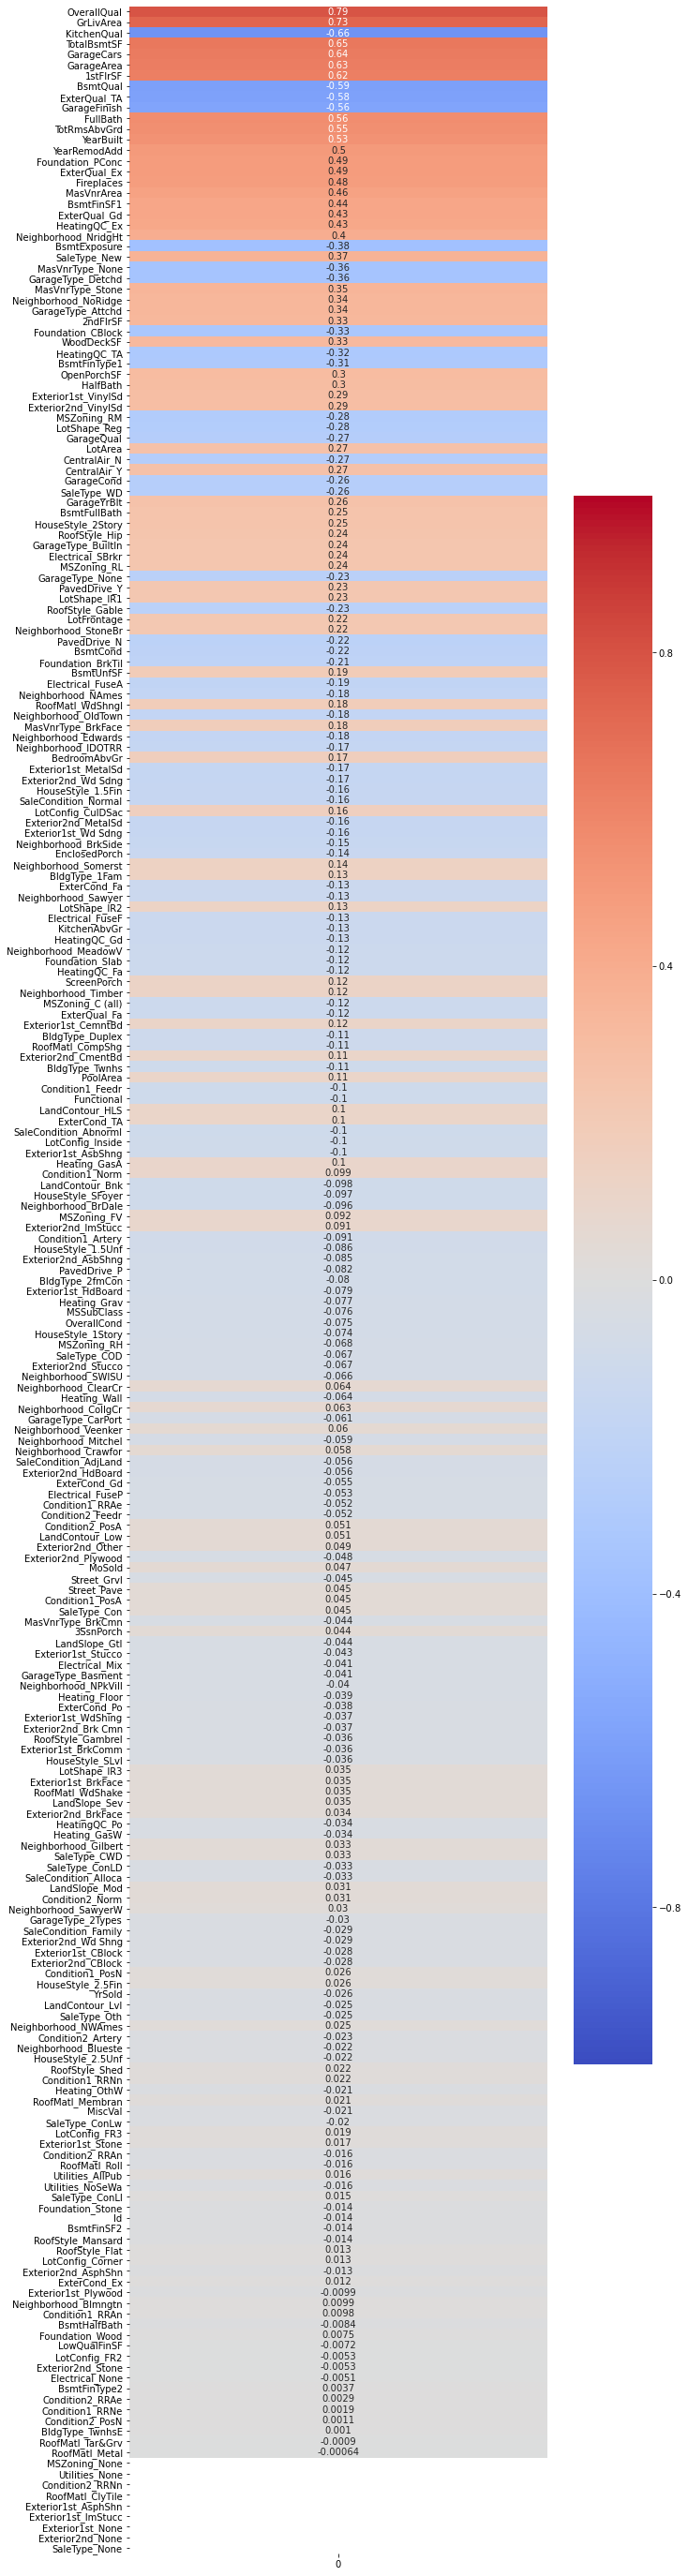

In [113]:
#Correlations between Sales Price & Int/Float Features
correlations = train_data.corrwith(train_df_raw['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,50))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

In [112]:
train_data['KitchenQual']

57      0.2
942     0.4
236     0.2
1212    0.4
89      0.4
       ... 
1245    0.4
69      0.4
1313    0.2
313     0.4
254     0.4
Name: KitchenQual, Length: 1168, dtype: float64

# MACHINE LEARNING MODELS

In [31]:
# Creating functions that can be used for all models

#Function to return R^2, Accuracy, Mean-Squared-Error, Mean-Squared-Log-Error 
def accuracies(regressor, train_data=train_data, dev_data=dev_data, prediction=prediction):
    #If there are negative predictions, end function
    neg = np.where(prediction<0)
    if len(neg[0])>0:
        print("Negative Price Prediction at indices:", neg) 
        print("Actual Sale Price at Negative Prediction:")
        print(dev_labels.iloc[neg])
        return
    print("R^2:",regressor.score(train_data,train_labels))    #Finding R^2
    print("Accuracy:",regressor.score(dev_data,dev_labels))    #Finding accuracy of dev data
    print("Mean Squared Error:", mean_squared_error(dev_labels, prediction, squared=False))
    print("Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction))
    fig=plt.figure()
    fig=plt.title('Sale Prices (prediction & actual)')
    fig=plt.xlabel('Ground Living Area')
    fig=plt.ylabel('Sales Price')
    fig=plt.scatter(dev_data['GrLivArea'],prediction, alpha=0.2)
    fig=plt.scatter(dev_data['GrLivArea'],dev_labels_bl, alpha=0.2)
    fig=plt.legend(['Predicted', 'Actual'],loc='upper left')

#Function to predict the test data (data without labels):
def predict_test(regressor):
    test_prediction = regressor.predict(test_data)
    for each in test_prediction:
        print(each)
    return test_prediction


### Randomized Search CV with Gradient Boosting Regressor

In [32]:
def rscv_with_gbr():
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import mean_squared_log_error

    train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
    dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
    test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]


    def GBR():
        gradbst = ensemble.GradientBoostingRegressor(min_samples_split=2,
                                                    loss='ls')
        gradbst_param = dict(n_estimators=range(1,10), max_depth=range(1,5), learning_rate= np.linspace(0,1,11))
        clf = RandomizedSearchCV(gradbst, gradbst_param, random_state=0, scoring='neg_mean_squared_log_error')
        search = clf.fit(train_data, train_labels)
        print(search.best_params_)
        return
    GBR()


    # USING PARAMETERS FROM train_data_mod Randomized Search CV
    gradbst_max = ensemble.GradientBoostingRegressor(n_estimators = 150, max_depth = 9, min_samples_split=2, learning_rate=.2,
                                                     loss='ls')
    gradbst_max.fit(train_data_mod, train_labels)
    prediction = gradbst_max.predict(dev_data_mod)
    gradbst_max.score(dev_data_mod,dev_labels)
    accuracies(gradbst_max, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)


    # USING PARAMETERS FROM train_data Randomized Search CV
    gradbst_max = ensemble.GradientBoostingRegressor(n_estimators = 130, max_depth = 1, min_samples_split=2, learning_rate=1.0,
                                                     loss='ls')
    gradbst_max.fit(train_data, train_labels)
    prediction = gradbst_max.predict(dev_data)
    gradbst_max.score(dev_data,dev_labels)
    accuracies(gradbst_max, train_data=train_data, dev_data=dev_data, prediction=prediction)

#scv_with_gbr()

### Linear Regressor

In [100]:
train_labels.describe()


count      1168.000000
mean     181774.432363
std       81672.738377
min       34900.000000
25%      129900.000000
50%      163250.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [75]:
train_data['OverallQual']

57      0.666667
942     0.333333
236     0.666667
1212    0.333333
89      0.333333
          ...   
1245    0.555556
69      0.666667
1313    0.888889
313     0.666667
254     0.444444
Name: OverallQual, Length: 1168, dtype: float64

In [77]:
train_labels

57      196500.0
942     150000.0
236     185500.0
1212    113000.0
89      123600.0
          ...   
1245    178000.0
69      225000.0
1313    333168.0
313     375000.0
254     145000.0
Name: SalePrice, Length: 1168, dtype: float64

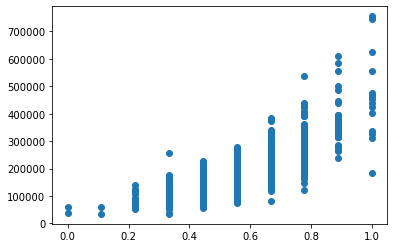

In [80]:
plt.scatter( train_data['OverallQual'], train_labels)

In [74]:
def lr():
    #Linear regression model 
    train_data_mod = train_data[['OverallQual']]
    dev_data_mod = dev_data[['OverallQual']]
    test_data_mod = test_data[['OverallQual']]
#     train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
#     dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
#     test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]

    print("Linear Regressor with modified Data:")
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_data_mod, train_labels)                 #fit model
    prediction = lr.predict(dev_data_mod)                 #predict
    accuracies(lr, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)

    print("")
    print("Linear Regressor with all features:")
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_data, train_labels)                 #fit model
    prediction = lr.predict(dev_data)                #predict
    accuracies(lr, train_data=train_data, dev_data=dev_data, prediction=prediction)
lr()

Linear Regressor with modified Data:
Negative Price Prediction at indices: (array([27], dtype=int64),)
Actual Sale Price at Negative Prediction:
636    60000.0
Name: SalePrice, dtype: float64

Linear Regressor with all features:
Negative Price Prediction at indices: (array([184, 200, 234], dtype=int64),)
Actual Sale Price at Negative Prediction:
548    125000.0
29      68500.0
825    385000.0
Name: SalePrice, dtype: float64


### K-Nearest Regressor

In [34]:
def knn():
    #K-Nearest Neighbors
    train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
    dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
    test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]


    # print("k-Nearest Neighbors Regressor:  ")
    # K= [int(x) for x in np.linspace(25,50,10)]    #runs kNN for x100 k's between 1 to 1000
    # scores2 = {}   #stores scores for each k
    # for k in K:
    #     # k-Nearest Neighbors Model
    #     knn = KNeighborsRegressor(n_neighbors=k)
    #     knn.fit(train_data, train_labels)  
    #     dev_predicted_labels = knn.predict(dev_data)
    #     # finding, printing, and storing f1_score    
    #     scores2[k] = knn.score(dev_data, dev_labels)

    # best = max(scores2, key=scores2.get)
    # print("Best scores is %.3f when K is %s" %(scores2[best],best))
    # #Plotting
    # fig1=plt.figure()
    # fig1=plt.title('kNN: k versus scores')
    # fig1=plt.xlabel('k')
    # fig1=plt.ylabel('scores')
    # fig1=plt.plot(list(scores2.keys()), list(scores2.values()))
    # plt.show()


    k=30  #best from previous graph
    print("k-Nearest Neighbors with modified Data:")
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_data_mod, train_labels)                  #fit model
    prediction = knn.predict(dev_data_mod)                 #predict
    accuracies(knn, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)

    k=30  #best from previous graph
    print("")
    print("k-Nearest Neighbors with all features:")
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_data, train_labels)                  #fit model
    prediction = knn.predict(dev_data)                 #predict
    accuracies(knn, train_data=train_data, dev_data=dev_data, prediction=prediction)
# knn()

### K-Nearest Regressor with Bagging

In [35]:
def knn_with_bagging():
    from sklearn.ensemble import BaggingRegressor
    train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
    dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
    test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]

    k=30  #best from previous graph
    print("")
    print("k-Nearest Neighbors w/ Bagging with modified data:")
    knn = KNeighborsRegressor(n_neighbors=k)
    bagging = BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=100, 
                               max_samples=0.5, max_features=0.5, random_state=0)
    bagging.fit(train_data_mod, train_labels)                  #fit model
    prediction = bagging.predict(dev_data_mod)                 #predict
    accuracies(bagging, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)



    k=30  #best from previous graph
    print("")
    print("k-Nearest Neighbors w/ Bagging with all features:")
    knn = KNeighborsRegressor(n_neighbors=k)
    bagging = BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=100, 
                               max_samples=0.5, max_features=0.5, random_state=0)
    bagging.fit(train_data, train_labels)                  #fit model
    prediction = bagging.predict(dev_data)                 #predict
    accuracies(bagging, train_data=train_data, dev_data=dev_data, prediction=prediction)



    #predict test data
    #predict_test(bagging)
# knn_with_bagging()

### DecisionTree, RandomForest, ExtraTrees


Decision Tree Regressor with modified data:
R^2: 0.9994009835706098
Accuracy: 0.45258784203524965
Mean Squared Error: 51581.846266830544
Mean Squared Log Error: 0.07162810733145687

Random Forest Regressor with modified data:
R^2: 0.9480863112069249
Accuracy: 0.6923756569882624
Mean Squared Error: 38667.84890861929
Mean Squared Log Error: 0.04395652786613261

Extra Trees Regressor with modified data:
R^2: 0.9994009835706098
Accuracy: 0.6434875244535387
Mean Squared Error: 41627.18367394633
Mean Squared Log Error: 0.047813330508932994

Decision Tree Regressor with all features:
R^2: 1.0
Accuracy: 0.6161843176760531
Mean Squared Error: 43191.771923763255
Mean Squared Log Error: 0.0499209653706136

Random Forest Regressor with all features:
R^2: 0.9703412228936241
Accuracy: 0.836965625167307
Mean Squared Error: 28150.055445747606
Mean Squared Log Error: 0.02257540568808097

Extra Trees Regressor with all features:
R^2: 1.0
Accuracy: 0.8623587200393673
Mean Squared Error: 25865.0912346661

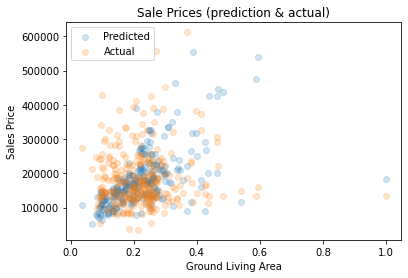

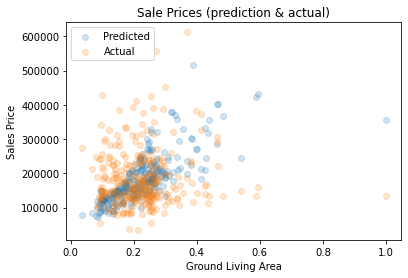

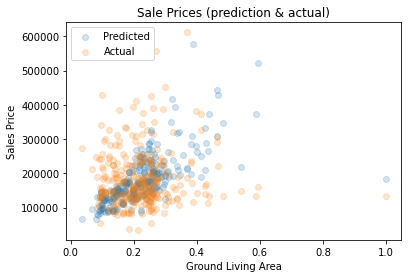

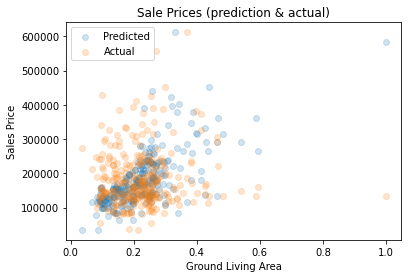

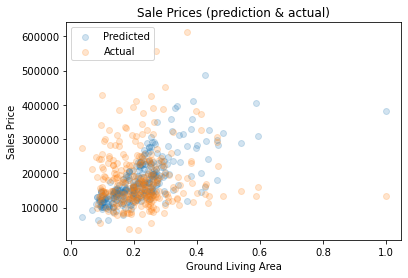

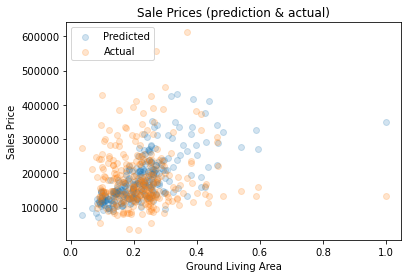

In [72]:
def dt_rf_et():
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import ExtraTreesRegressor
    train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
    dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
    test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]


    print("")
    print("Decision Tree Regressor with modified data:")
    DTR = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=0)
    DTR.fit(train_data_mod, train_labels)                  #fit model
    prediction = DTR.predict(dev_data_mod)                 #predict
    accuracies(DTR, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)


    print("")
    print("Random Forest Regressor with modified data:")
    RFR = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    RFR.fit(train_data_mod, train_labels)                  #fit model
    prediction = RFR.predict(dev_data_mod)                 #predict
    accuracies(RFR, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)


    print("")
    print("Extra Trees Regressor with modified data:")
    ETR = ExtraTreesRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    ETR.fit(train_data_mod, train_labels)                  #fit model
    prediction = ETR.predict(dev_data_mod)                 #predict
    accuracies(ETR, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)




    print("")
    print("Decision Tree Regressor with all features:")
    DTR = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=0)
    DTR.fit(train_data, train_labels)                  #fit model
    prediction = DTR.predict(dev_data)                 #predict
    accuracies(DTR, train_data=train_data, dev_data=dev_data, prediction=prediction)


    print("")
    print("Random Forest Regressor with all features:")
    RFR = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    RFR.fit(train_data, train_labels)                  #fit model
    prediction = RFR.predict(dev_data)                 #predict
    accuracies(RFR, train_data=train_data, dev_data=dev_data, prediction=prediction)



    print("")
    print("Extra Trees Regressor with all features:")
    ETR = ExtraTreesRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    ETR.fit(train_data, train_labels)                  #fit model
    prediction = ETR.predict(dev_data)                 #predict
    accuracies(ETR, train_data=train_data, dev_data=dev_data, prediction=prediction)


    # prediction_test = RFR.predict(test_data)                 #predict test data if score is good
    # for each in prediction_test:
    #     print(each)

    # prediction_test = ETR.predict(test_data)                 #predict test data if score is good
    # for each in prediction_test:
    #     print(each)

dt_rf_et()

### ExtraTrees with gridsearchcv

In [37]:
def et_with_gscv():
    # from sklearn.model_selection import GridSearchCV
    # from sklearn.ensemble import ExtraTreesRegressor

    # print("")
    # print("Extra Trees Regressor w/ gridsearchcv with all features:")
    # ETR = ExtraTreesRegressor(min_samples_split=2, random_state=0)
    # GSCV_param = dict(n_estimators=range(10,15), max_depth=range(1,30))
    # GSCV = GridSearchCV(estimator=ETR, param_grid=GSCV_param, cv=5, scoring='neg_mean_squared_log_error')

    # GSCV.fit(train_data, train_labels)                  #fit model
    # prediction = GSCV.predict(dev_data)                 #predict
    # print("Indices with negative sales price", np.where(prediction<0))
    # neg = np.where(prediction<0)
    # prediction[neg]=0
    # print("R^2:",GSCV.score(train_data,train_labels))    #Finding R^2
    # print("Accuracy:",GSCV.score(dev_data,dev_labels))    #Finding accuracy of dev data
    # print("Root Mean Squared Error:", mean_squared_error(dev_labels, prediction, squared=False))
    # print("Root Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction))

    # print(GSCV.best_params_)

    print("")
    print("Extra Trees Regressor with all features:")
    ETR = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
    ETR.fit(train_data, train_labels)                  #fit model
    prediction = ETR.predict(dev_data)                 #predict
    accuracies(ETR, train_data=train_data, dev_data=dev_data, prediction=prediction)

    predict_test(ETR)

# et_with_gscv()

### Neural Net with Tensorflow

In [38]:
from numpy.random import seed
seed(0)
# from tensorflow import set_random_seed
from tensorflow import random
random.set_seed(0)

import tensorflow as tf
tf.__version__
%matplotlib inline
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
import time 

In [105]:
#Function to return a Plot and Mean-Squared-Log-Error 
def accuracies_nn(regressor, history, train_data=train_data, dev_data=dev_data, 
                  prediction=prediction, m=0):
    
    #If there are negative predictions, end function
    neg = np.where(prediction[:,0]<0)
    if len(neg[0])>0:
        print("ERROR: Negative Price Prediction at indices:", neg) 
        print("Actual Sale Price at Negative Prediction:")
        print(dev_labels.iloc[neg[0]])
        return
    
    if m==1:
        regressor.summary()
    
    print("Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction))
    
    #Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
    ax1.set_title('Development Data Sale Prices (prediction & actual)')
    ax1.set_xlabel('Ground Living Area')
    ax1.set_ylabel('Sales Price')
    ax1.scatter(dev_data['GrLivArea'],prediction, alpha=0.2, color='red')
    ax1.scatter(dev_data['GrLivArea'],dev_labels_bl, alpha=0.2, color='blue')
    ax1.legend(['Predicted', 'Actual'],loc='upper left')  
    ax2.set_title('Train vs Validation')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Mean Squared Log Error')
    ax2.plot(history.history['msle'])
    ax2.plot(history.history['val_msle'])
    ax2.legend(['Train', 'Validation/Development'],loc='upper left') 
    ax3.set_title('Sales Price prediction&actual')
    ax3.set_xlabel('Prediction')
    ax3.set_ylabel('Actual')
    ax3.scatter(prediction,dev_labels)
    ax3.plot(np.linspace(0,500000,1000),np.linspace(0,500000,1000))
    ax3.set_xlim(0,500000)
    ax3.set_ylim(0,500000)
    #ax3.legend(['Train', 'Validation/Development'],loc='upper left')  
    
#Function to predict the test data (data without labels):
def predict_test_nn(regressor):
    test_prediction = regressor.predict(test_data)
    for each in test_prediction:
        print(each[0])
    return test_prediction


### Start with basic NN, single layer

In [60]:
def nn_single_layer(batch=1, epochs=10, act='linear', verb=0, opti=optimizers.SGD(lr=0.2)): 
    
    model = Sequential()
    model.add(Dense(1, input_dim=240, activation = act))
    #model.summary()
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    prediction = model.predict(dev_data)                 #predict
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, (end-start)))
    print("Optimizer: SGD, Activation: %s" %act)
    
    return model, history, prediction

Epoch 1/10
117/117 [==============================] - 0s 3ms/step - loss: 52.1184 - msle: 52.1184 - val_loss: 48.2310 - val_msle: 48.2310
Epoch 2/10
117/117 [==============================] - 0s 2ms/step - loss: 46.6029 - msle: 46.6029 - val_loss: 44.9741 - val_msle: 44.9741
Epoch 3/10
117/117 [==============================] - 0s 3ms/step - loss: 44.0116 - msle: 44.0116 - val_loss: 42.8956 - val_msle: 42.8956
Epoch 4/10
117/117 [==============================] - 0s 2ms/step - loss: 42.2363 - msle: 42.2363 - val_loss: 41.3772 - val_msle: 41.3772
Epoch 5/10
117/117 [==============================] - 0s 2ms/step - loss: 40.8907 - msle: 40.8907 - val_loss: 40.1859 - val_msle: 40.1859
Epoch 6/10
117/117 [==============================] - 0s 3ms/step - loss: 39.8105 - msle: 39.8105 - val_loss: 39.2083 - val_msle: 39.2083
Epoch 7/10
117/117 [==============================] - 0s 2ms/step - loss: 38.9102 - msle: 38.9102 - val_loss: 38.3811 - val_msle: 38.3811
Epoch 8/10
117/117 [==============

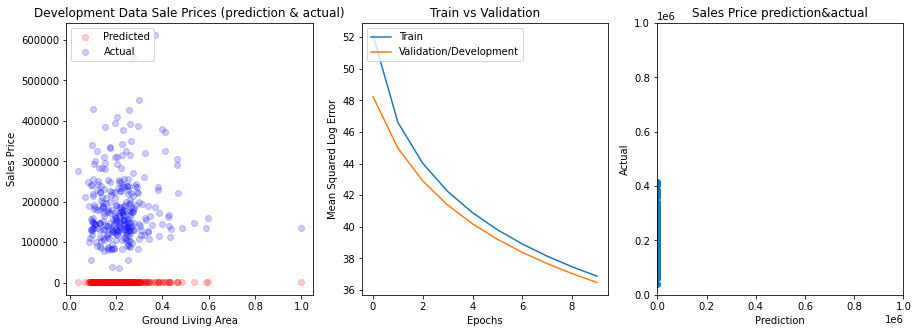

In [98]:
#Started with a few epochs and a small batch size to test algorithm
#Used SGD optimizer and 'linear' activation too
#MSLE is pretty high, let's try larger epochs and smaller batches

model, history, prediction = nn_single_layer(batch=10, epochs=10, verb=1)
accuracies_nn(model, train_data=train_data, dev_data=dev_data, 
                  prediction=prediction, history=history, m=1)

In [93]:
# With 1000 epochs and 5 batch size, thats about 200 iteration (steps) per epoch or a total of 200,000 steps
# MSLE improved but took a long time to reach a bad MSLE anyways...
model, history, prediction = nn_single_layer(batch=5, epochs=1000, verb=0)
accuracies_nn(model, train_data=train_data, dev_data=dev_data, 
                  prediction=prediction, history=history, m=0)

KeyboardInterrupt: 

In [103]:
# Dropped down to 100 epochs and 10 batch size, thats about 100 iteration (steps) per epoch or a total of 10,000 steps
# MSLE is better than 1st case and worse than larger case. 
# Let's use this to compare if a different optimzer or activation function could be better.
model, history, prediction = nn_single_layer(batch=10, epochs=100, verb=0)
accuracies_nn(model, train_data=train_data, dev_data=dev_data, 
                  prediction=prediction, history=history, m=0)

KeyboardInterrupt: 

Batch Size: 1, Epochs: 10, Training Time: 9.529
Optimizer: SGD, Activation: linear
Mean Squared Log Error: 0.08239278010756164


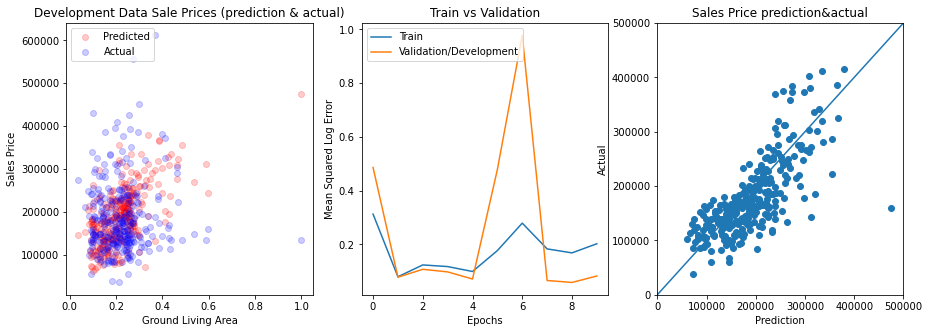

In [107]:
# Adam optimizer

model, history, prediction = nn_single_layer(batch=1, epochs=10, act='linear', verb=0, 
                                             opti=optimizers.Adam(learning_rate=1000))
accuracies_nn(model, train_data=train_data, dev_data=dev_data, 
                  prediction=prediction, history=history, m=0)

In [ ]:
# Adam optimizer

model, history, prediction = nn_single_layer(batch=1, epochs=10, act='linear', verb=0, 
                                             opti=optimizers.Adam(learning_rate=100))
accuracies_nn(model, train_data=train_data, dev_data=dev_data, 
                  prediction=prediction, history=history, m=0)

Batch Size: 10, Epochs: 100, Training Time: 12.825
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 25.01409446140622


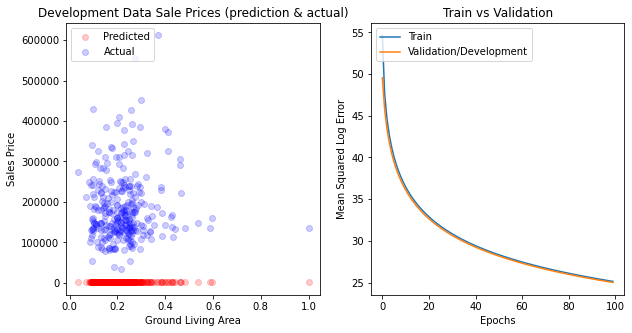

In [71]:
# Relu activation

model, history, prediction = nn_single_layer(batch=10, epochs=100, verb=0, act='relu',
                                             opti=optimizers.SGD(learning_rate=0.2))
accuracies_nn(model, train_data=train_data, dev_data=dev_data, 
                  prediction=prediction, history=history, m=0)

In [84]:
def nn_two_layer(batch=5, epochs=5, hidden1_n=5): 
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=240, activation ='relu'))
    model.add(Dense(1, activation ='linear'))
    model.summary()
    sgd = optimizers.SGD(lr=0.2)
    model.compile(optimizer=sgd, loss='msle', metrics=['msle'])

    history = model.fit(train_data, train_labels, batch_size=batch, verbose=1, epochs=epochs)
    return model, history
   
model, history = nn_two_layer(batch=5, epochs=10, hidden1_n=5)
prediction = model.predict(dev_data)                 #predict
accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction)


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 5)                 1205      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 6         
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
234/234 [==============================] - 0s 2ms/step - loss: 20.6736 - msle: 20.6736
Epoch 2/10
234/234 [==============================] - 0s 2ms/step - loss: 11.4103 - msle: 11.4103
Epoch 3/10
234/234 [==============================] - 0s 2ms/step - loss: 8.8188 - msle: 8.8188
Epoch 4/10
234/234 [==============================] - 0s 2ms/step - loss: 7.3433 - msle: 7.3433
Epoch 5/10
234/234 [==============================] - 0s 1ms/step - loss: 6.3498 - msle: 6.3498
Epoch 6/10
234/234 [=========

TypeError: accuracies_nn() missing 1 required positional argument: 'history'

In [ ]:
def nn_three_layer(batch=5, epochs=50, hidden1_n=24, hidden2_n=5): 
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=240, activation ='relu'))
    model.add(Dense(hidden2_n, activation ='relu'))
    model.add(Dense(1, activation ='linear'))
    model.summary()
    sgd = optimizers.SGD(lr=0.2)
    model.compile(optimizer=sgd, loss='msle', metrics=['msle'])

    history = model.fit(train_data, train_labels, batch_size=batch, verbose=1, epochs=epochs)
    return model, history
model, history = nn_three_layer()

prediction = model.predict(dev_data)                 #predict
accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction)


In [ ]:
def nn_four_layer(batch=10, epochs=10, hidden1_n=24, hidden2_n=5, hidden3_n=2): 
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=240, activation ='relu'))
    model.add(Dense(hidden2_n, activation ='relu'))
    model.add(Dense(hidden3_n, activation ='relu'))
    model.add(Dense(1, activation ='linear'))
    model.summary()
    sgd = optimizers.SGD(lr=0.2)
    model.compile(optimizer=sgd, loss='msle', metrics=['msle'])

    history = model.fit(train_data, train_labels, batch_size=batch, verbose=1, epochs=epochs)
    return model, history
model, history = nn_four_layer(batch=10, epochs=10, hidden1_n=24, hidden2_n=5, hidden3_n=2)

prediction = model.predict(dev_data)                 #predict
accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction)

In [ ]:
test_prediction = model.predict(test_data)
for each in test_prediction:
    print(each[0])

In [ ]:
epochs=[5,9,19,50,100]
msle=[]
for ep in epochs:
    def nn_five_layer(batch=10, epochs=100, hidden1_n=24, hidden2_n=12, hidden3_n=5, hidden4_n=2): 
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=240, activation ='relu'))
        model.add(Dense(hidden2_n, activation ='relu'))
        model.add(Dense(hidden3_n, activation ='relu'))
        model.add(Dense(hidden4_n, activation ='relu'))
        model.add(Dense(1, activation ='linear'))
        model.summary()
        sgd = optimizers.SGD(lr=0.01)
        model.compile(optimizer=sgd, loss='msle', metrics=['msle'])

        history = model.fit(train_data, train_labels, batch_size=batch, verbose=1, epochs=epochs)
        return model, history
    model, history = nn_five_layer(epochs=ep)

    prediction = model.predict(dev_data)                 #predict
    print("Mean Squared Error:", mean_squared_error(dev_labels, prediction, squared=False))
    #print("Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction))
    #msle.append(mean_squared_log_error(dev_labels, prediction))
  




In [ ]:
def nn_five_layer(batch=10, epochs=100, hidden1_n=24, hidden2_n=12, hidden3_n=5, hidden4_n=2): 
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=240, activation ='relu'))
    model.add(Dense(hidden2_n, activation ='relu'))
    model.add(Dense(hidden3_n, activation ='relu'))
    model.add(Dense(hidden4_n, activation ='relu'))
    model.add(Dense(1, activation ='linear'))
    model.summary()
    sgd = optimizers.SGD(lr=0.01)
    model.compile(optimizer=sgd, loss='msle', metrics=['msle'])

    history = model.fit(train_data, train_labels, batch_size=batch, verbose=1, epochs=epochs)
    return model, history
model, history = nn_five_layer(epochs=ep)

prediction = model.predict(dev_data)                 #predict
print("Mean Squared Error:", mean_squared_error(dev_labels, prediction, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction))

test_prediction = model.predict(test_data)
for each in test_prediction:
    print(each[0])

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['msle'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
## Model
model = Sequential()    #sequential architecture (e forward architecture???)
model.add(Dense(10, input_dim=784, activation='softmax'))    #10 output nodes, input = features, logistic function = softmax
# How many weights will we have...?

## Cost function & Objective (and solver)
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])   #loss = cost function
start_time = time.time()
history = model.fit(train_data, train_labels_b, shuffle=False, batch_size=numTrainExamples, verbose=1, epochs=10) 
# batch_size for batch gradient descent
# epochs = loop through entire data
# if batch, epochs = 50, we go over data 50 times

print ('Train time = %.2f' %(time.time() - start_time))
score = model.evaluate(test_data, test_labels_b, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=240, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

#https://datascienceplus.com/keras-regression-based-neural-networks/